# Zhenlong Li (zl51)
## IE598 MLF F18
### Module 5 Homework (Dimensionality Reduction)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.decomposition import KernelPCA

In [2]:
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/' 'machine-learning-databases/wine/wine.data', header=None)
df_wine.columns = ['Class label', 'Alcohol', 
                   'Malic acid', 'Ash', 
                   'Alcalinity of ash', 
                   'Magnesium',
                   'Total phenols',
                   'Flavanoids',
                   'Nonflavanoid phenols',
                   'Proanthocyanins', 
                   'Color intensity',
                   'Hue',
                   'OD280/OD315 of diluted wines',
                   'Proline']
X = df_wine.iloc[:, 1:]
y = df_wine.iloc[:, 0]

In [3]:
print('Class labels', np.unique(df_wine['Class label']))

Class labels [1 2 3]


In [4]:
df_wine.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


## Part 1: EDA

Describe the data sets sufficiently using the methods and visualizations that we used previously.  Include any output, graphs, tables, heatmaps, box plots, etc. that you think is necessary to represent the data.  Label your figures and axes. DO NOT INCLUDE CODE, only output figures!

In [5]:
df_wine.describe()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


/Users/AdrianLee/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


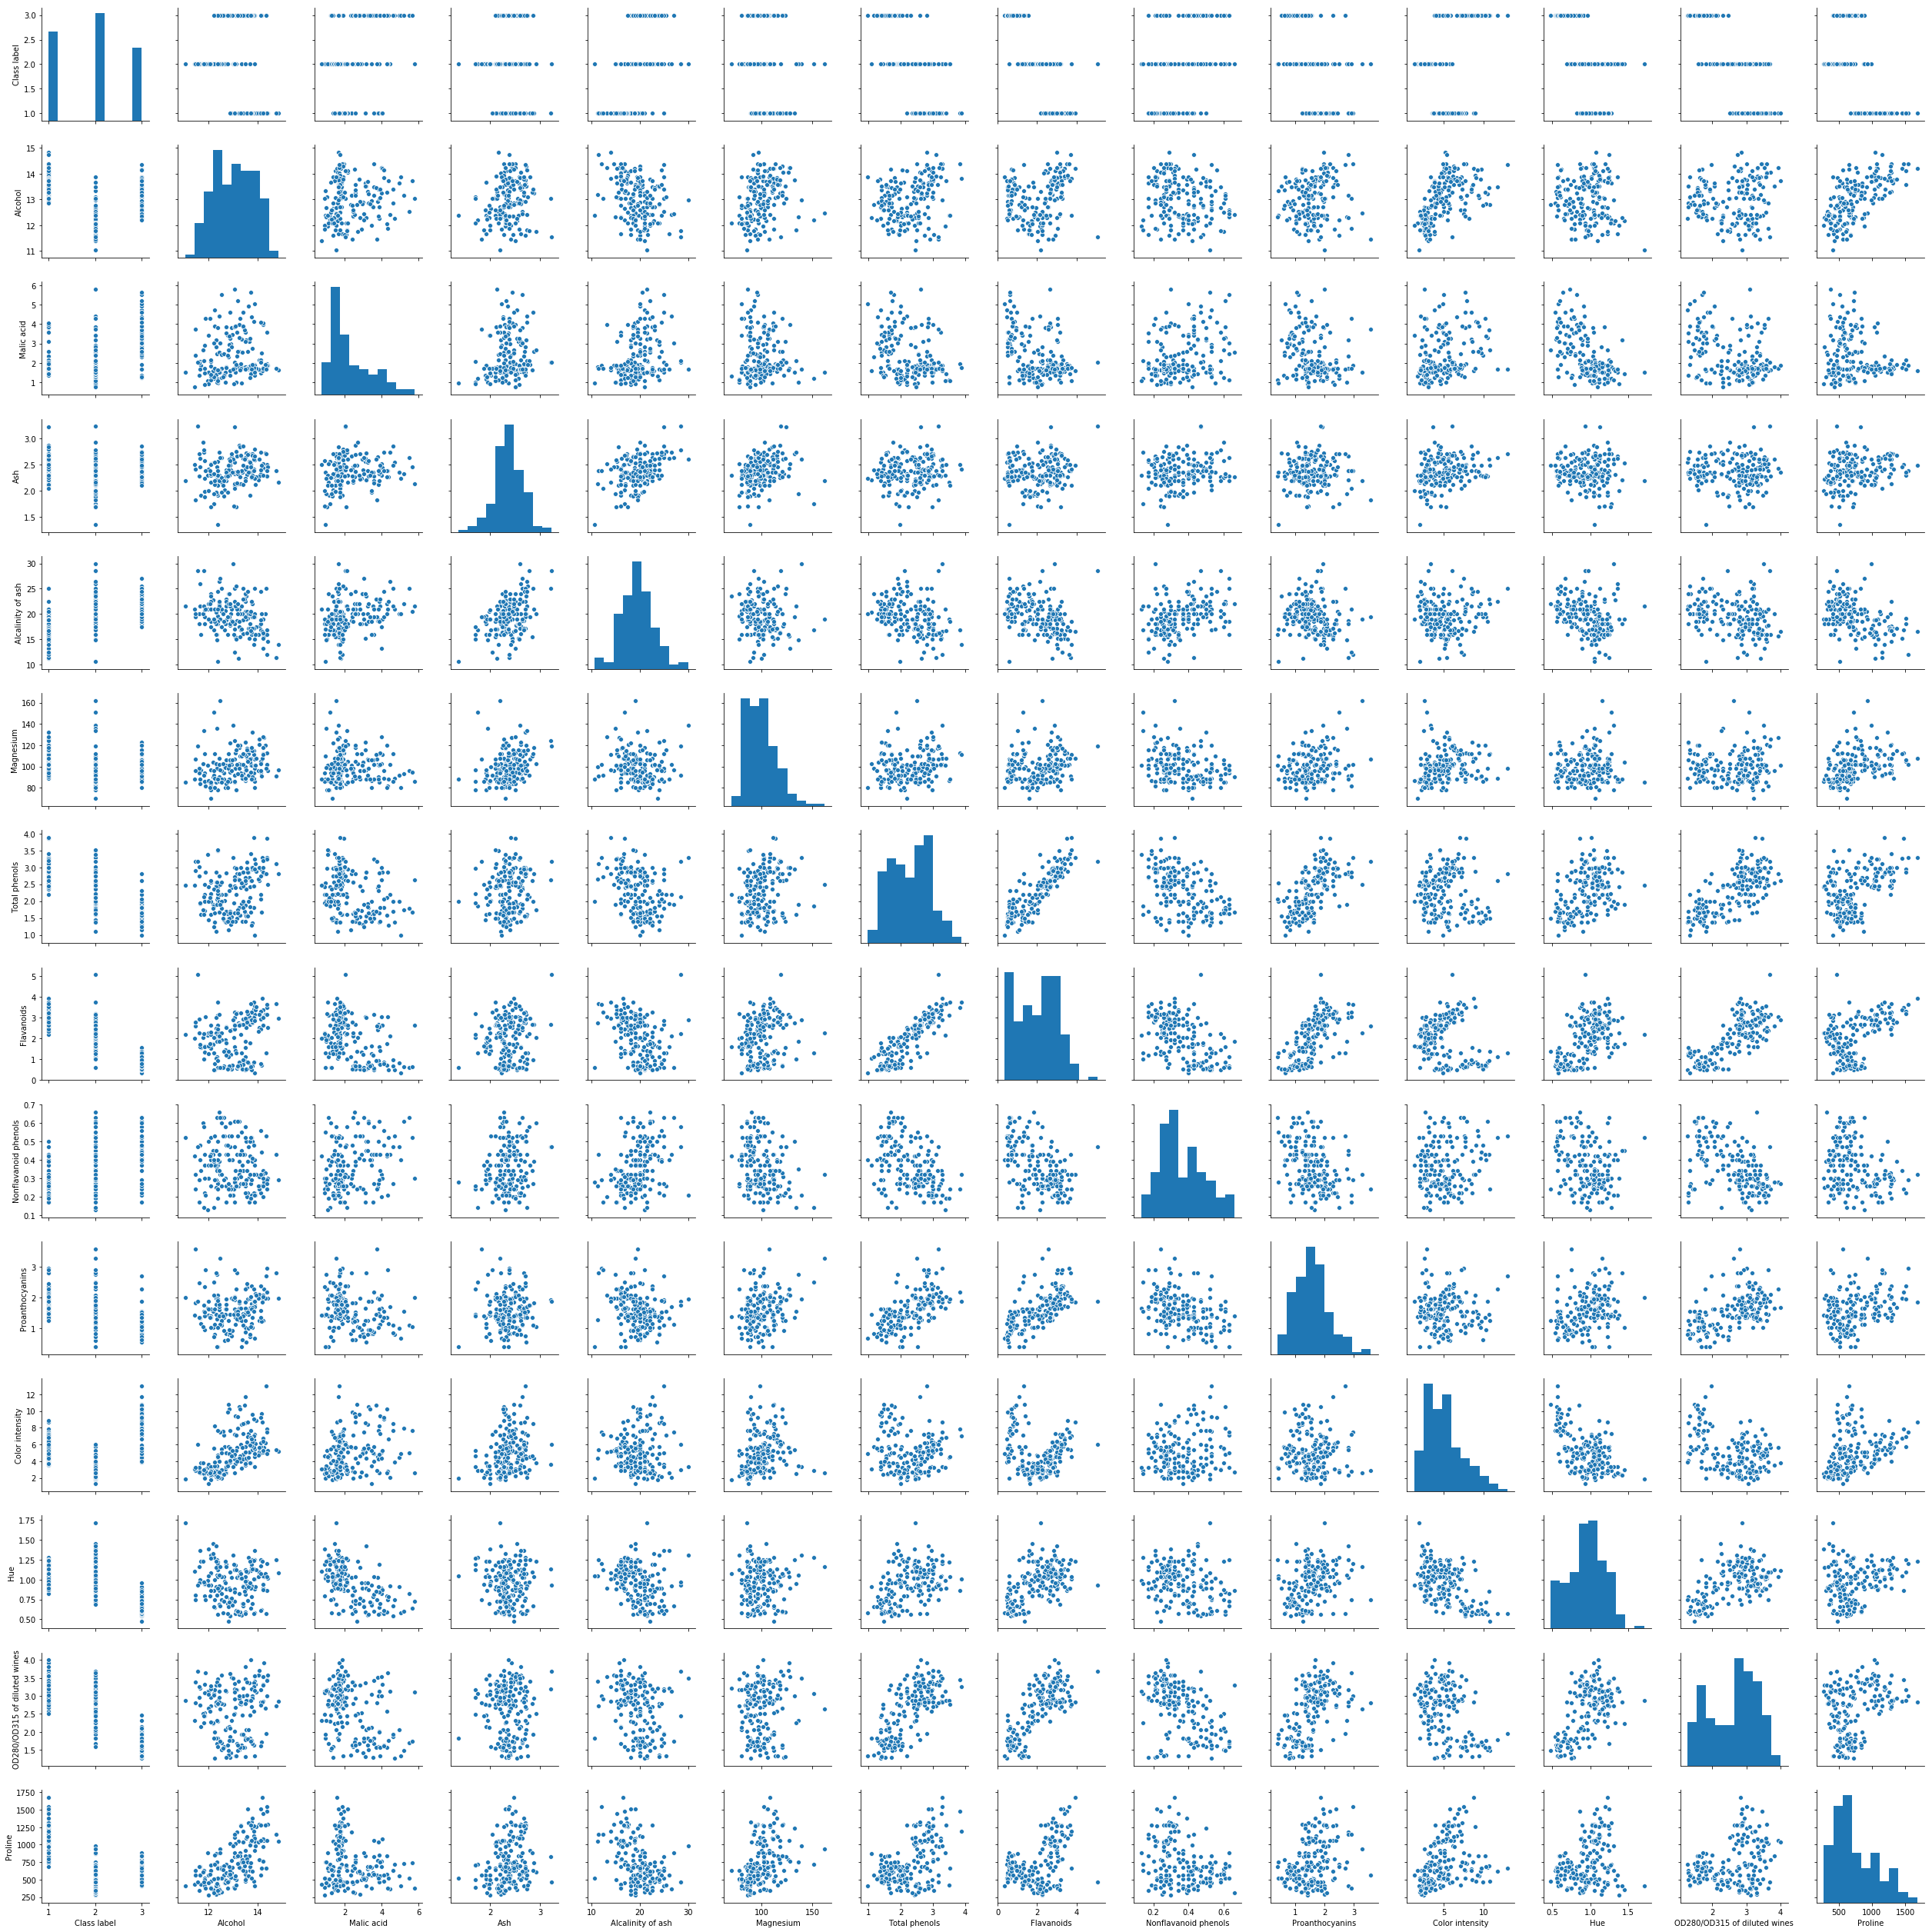

In [6]:
sns.pairplot(df_wine[df_wine.columns], size=2.5)
plt.tight_layout()
plt.show()

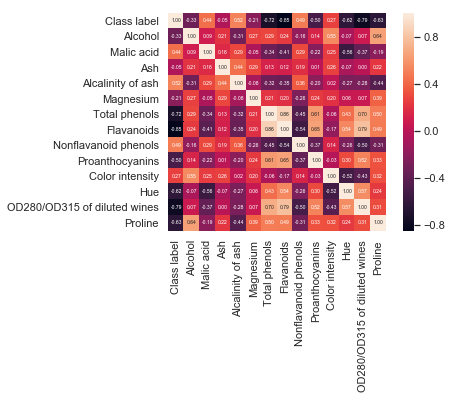

In [7]:
cm = np.corrcoef(df_wine[df_wine.columns].values.T)
sns.set(font_scale = 1)
hm = sns.heatmap(cm,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size':5},
                 yticklabels=df_wine.columns,
                 xticklabels=df_wine.columns,
                 )
plt.show()

Split data into training and test sets.  Use random_state = 42. Use 80% of the data for the training set.  Use the same split for all experiments.

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

## Part 2: Logistic regression classifier v. SVM classifier - baseline

### Logistic Regression

Fit a logistic classifier model to both datasets using SKlearn.  Calculate its accuracy score for both in sample and out of sample (train and test sets).  (You may use CV accuracy score if you wish).

In [9]:
lr = LogisticRegression(C=100.0, random_state=1)
lr.fit(X_train_std, y_train)
y_train_pred = lr.predict(X_train_std)
y_pred = lr.predict(X_test_std)

In [10]:
print('Accuracy score of train set: %.2f' % metrics.accuracy_score(y_train, y_train_pred))
print('Accuracy score of test set: %.2f' % metrics.accuracy_score(y_test, y_pred))

Accuracy score of train set: 1.00
Accuracy score of test set: 0.97


### SVM classifier

Fit a SVM classifier model to both datasets using SKlearn.  Calculate its accuracy score for both in sample and out of sample (train and test sets).  (You may use CV accuracy score if you wish).

In [11]:
svm = SVC(kernel='linear', C=1.0, random_state=1)
svm.fit(X_train_std, y_train)
y_train_pred = svm.predict(X_train_std)
y_pred = svm.predict(X_test_std)

In [12]:
print('Accuracy score of train set: %.2f' % metrics.accuracy_score(y_train, y_train_pred))
print('Accuracy score of test set: %.2f' % metrics.accuracy_score(y_test, y_pred))

Accuracy score of train set: 1.00
Accuracy score of test set: 0.94


## Part 3:  Perform a PCA on both datasets

Refit both a logistic and SVM classifier on the PCA transformed datasets. You may choose to use only 2 components, or select a higher appropriate intrinsic dimension.  Calculate accuracy scores for both in sample and out of sample (train and test sets) on both datasets.

In [13]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

### Logistic Regression via PCA

In [14]:
lr.fit(X_train_pca, y_train)
y_train_pred = lr.predict(X_train_pca)
y_pred = lr.predict(X_test_pca)

In [15]:
print('Accuracy score of train set: %.2f' % metrics.accuracy_score(y_train, y_train_pred))
print('Accuracy score of test set: %.2f' % metrics.accuracy_score(y_test, y_pred))

Accuracy score of train set: 0.97
Accuracy score of test set: 0.89


### SVM via PCA 

In [16]:
svm.fit(X_train_pca, y_train)
y_train_pred = svm.predict(X_train_pca)
y_pred = svm.predict(X_test_pca)

In [17]:
print('Accuracy score of train set: %.2f' % metrics.accuracy_score(y_train, y_train_pred))
print('Accuracy score of test set: %.2f' % metrics.accuracy_score(y_test, y_pred))

Accuracy score of train set: 0.98
Accuracy score of test set: 0.92


## Part 4: Perform an LDA on both datasets

Refit both a logistic and SVM classifier on the LDA transformed datasets. You may choose to use only 2 discriminants, or select a higher appropriate number. Calculate accuracy scores for both in sample and out of sample (train and test sets) on both datasets.

In [18]:
lda = LDA(n_components=2)
X_train_lda = lda.fit_transform(X_train_std, y_train)
X_test_lda = lda.transform(X_test_std)

### Logistic Regression via LDA

In [19]:
lr.fit(X_train_lda, y_train)
y_train_pred = lr.predict(X_train_lda)
y_pred = lr.predict(X_test_lda)

In [20]:
print('Accuracy score of train set: %.2f' % metrics.accuracy_score(y_train, y_train_pred))
print('Accuracy score of test set: %.2f' % metrics.accuracy_score(y_test, y_pred))

Accuracy score of train set: 1.00
Accuracy score of test set: 0.97


### SVM via LDA

In [21]:
svm.fit(X_train_lda, y_train)
y_train_pred = svm.predict(X_train_lda)
y_pred = svm.predict(X_test_lda)

In [22]:
print('Accuracy score of train set: %.2f' % metrics.accuracy_score(y_train, y_train_pred))
print('Accuracy score of test set: %.2f' % metrics.accuracy_score(y_test, y_pred))

Accuracy score of train set: 1.00
Accuracy score of test set: 0.94


## Part 5: Perform a kPCA on both datasets

Refit both a logistic and SVM classifier on the kPCA transformed datasets. Use the rbf kernel.  Test several different values for Gamma.  Calculate accuracy scores for both in sample and out of sample (train and test sets) on both datasets.

In [23]:
scikit_kpca = KernelPCA(n_components=2, kernel='rbf', gamma=15)
X_train_skernpca = scikit_kpca.fit_transform(X_train_std)
X_test_skernpca = scikit_kpca.transform(X_test_std)

### Logistic Regression via kPCA

In [24]:
lr.fit(X_train_skernpca, y_train)
y_train_pred = lr.predict(X_train_skernpca)
y_pred = lr.predict(X_test_skernpca)

In [25]:
print('Accuracy score of train set: %.2f' % metrics.accuracy_score(y_train, y_train_pred))
print('Accuracy score of test set: %.2f' % metrics.accuracy_score(y_test, y_pred))

Accuracy score of train set: 0.43
Accuracy score of test set: 0.39


### SVM via kPCA

In [26]:
svm.fit(X_train_skernpca, y_train)
y_train_pred = svm.predict(X_train_skernpca)
y_pred = svm.predict(X_test_skernpca)

In [27]:
print('Accuracy score of train set: %.2f' % metrics.accuracy_score(y_train, y_train_pred))
print('Accuracy score of test set: %.2f' % metrics.accuracy_score(y_test, y_pred))

Accuracy score of train set: 0.43
Accuracy score of test set: 0.39


### Test gamma LR via kPCA

In [28]:
range = [0.01, 0.1, 1, 2.5, 5, 15]
train_scores = []
test_scores = []

for g in range:
    scikit_kpca = KernelPCA(n_components=2, kernel='rbf', gamma=g)
    X_train_skernpca = scikit_kpca.fit_transform(X_train_std)
    X_test_skernpca = scikit_kpca.transform(X_test_std)
    lr.fit(X_train_skernpca, y_train)
    y_train_pred = lr.predict(X_train_skernpca)
    y_pred = lr.predict(X_test_skernpca)
    train_scores.append(metrics.accuracy_score(y_train, y_train_pred))
    test_scores.append(metrics.accuracy_score(y_test, y_pred))
    
i = 0
while i < len(range):
    print("gamma =", range[i], "", 'Accuracy score of train set: %.2f' % train_scores[i], 'Accuracy score of test set: %.2f' % test_scores[i])
    i += 1

gamma = 0.01  Accuracy score of train set: 0.97 Accuracy score of test set: 0.92
gamma = 0.1  Accuracy score of train set: 0.99 Accuracy score of test set: 0.94
gamma = 1  Accuracy score of train set: 0.64 Accuracy score of test set: 0.69
gamma = 2.5  Accuracy score of train set: 0.49 Accuracy score of test set: 0.39
gamma = 5  Accuracy score of train set: 0.44 Accuracy score of test set: 0.39
gamma = 15  Accuracy score of train set: 0.43 Accuracy score of test set: 0.39


### Test gamma SVM via kPCA

In [29]:
range = [0.01, 0.1, 1, 2.5, 5, 15]
train_scores = []
test_scores = []

for g in range:
    scikit_kpca = KernelPCA(n_components=2, kernel='rbf', gamma=g)
    X_train_skernpca = scikit_kpca.fit_transform(X_train_std)
    X_test_skernpca = scikit_kpca.transform(X_test_std)
    svm.fit(X_train_skernpca, y_train)
    y_train_pred = svm.predict(X_train_skernpca)
    y_pred = svm.predict(X_test_skernpca)
    train_scores.append(metrics.accuracy_score(y_train, y_train_pred))
    test_scores.append(metrics.accuracy_score(y_test, y_pred))
    
i = 0
while i < len(range):
    print("gamma =", range[i], "", 'Accuracy score of train set: %.2f' % train_scores[i], 'Accuracy score of test set: %.2f' % test_scores[i])
    i += 1

gamma = 0.01  Accuracy score of train set: 0.98 Accuracy score of test set: 0.94
gamma = 0.1  Accuracy score of train set: 0.97 Accuracy score of test set: 0.97
gamma = 1  Accuracy score of train set: 0.50 Accuracy score of test set: 0.39
gamma = 2.5  Accuracy score of train set: 0.42 Accuracy score of test set: 0.39
gamma = 5  Accuracy score of train set: 0.40 Accuracy score of test set: 0.39
gamma = 15  Accuracy score of train set: 0.43 Accuracy score of test set: 0.39


In [30]:
print("My name is Zhenlong Li")
print("My NetID is: zl51")
print("I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.")

My name is Zhenlong Li
My NetID is: zl51
I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.


## Part 6: Conclusions
Write a short paragraph summarizing your findings.  Which model performs best on the untransformed data?  Which transformation leads to the best performance increases?  Report your results using the Results worksheet format.  Embed the completed table in your report. 

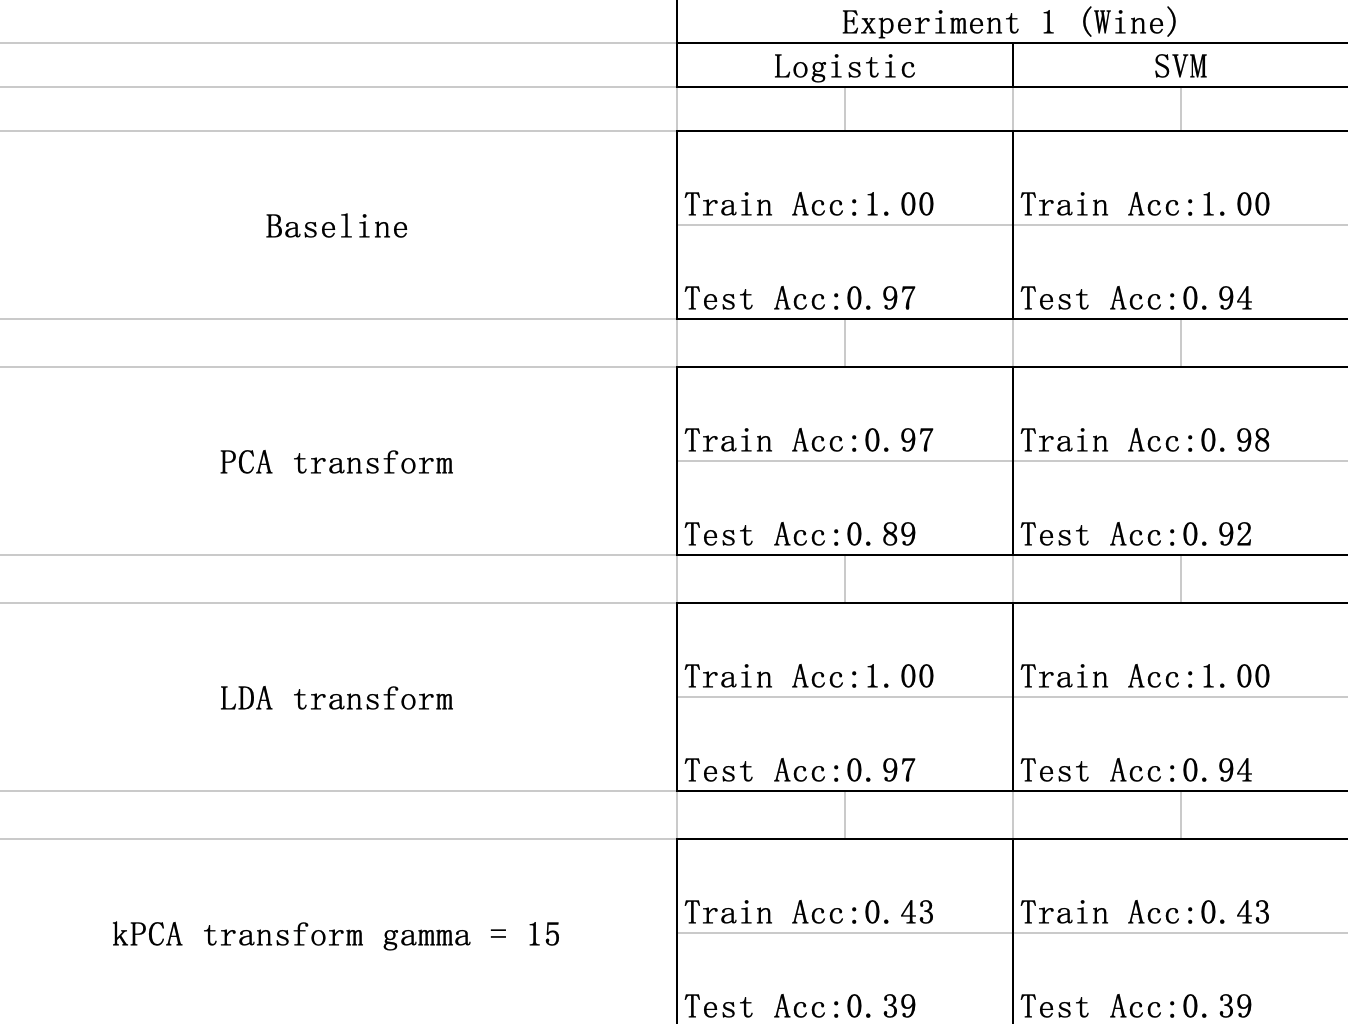

From what I found, it's difficult to tell which model performs best on the untransformed data. However, we can see the LDA transform leads to the best performance increases.

## Part 7: Appendix

Link to github repo: https://github.com/zhli3378/IE598_Machine_Learning_in_Fin_Lab/blob/master/IE598_F18_HW5/zl51_IE598MLF_HW5.ipynb